In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Tensorflowで使うGPUメモリの上限を指定
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
config.gpu_options.visible_device_list = '0' #ndivia-smiを見て判断
session = tf.Session(config=config)
from keras import backend as K
K.set_session(session)

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from itertools import zip_longest

import gensim
from sklearn.preprocessing import LabelEncoder


from IPython.display import display, Image, display_jpeg, SVG
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# import vqa_module.util as myutil
# import vqa_module.text_process as my_text_process

/home/umada/anaconda3/envs/vqa-env/lib/python3.6/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [6]:
from keras.layers import Activation, Concatenate, Dense, Dot, Dropout, Input, Reshape
from keras.layers import Multiply, Flatten, RepeatVector, Permute, Lambda
from keras.layers import Conv2D, CuDNNGRU
from keras.layers.normalization import BatchNormalization

from keras.models import Model
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from keras.applications.densenet import DenseNet201
from keras.callbacks import Callback, ModelCheckpoint
from keras.optimizers import Adam

from keras.utils import np_utils, generic_utils, plot_model
from tensorflow.python.keras.utils.vis_utils import plot_model, model_to_dot
from keras.preprocessing.image import load_img, img_to_array

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop

# MNISTデータを読込む
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNISTデータを加工する
x_train  = x_train.reshape(60000, 784)
x_test   = x_test.reshape(10000, 784)
x_train  = x_train.astype('float32')
x_test   = x_test.astype('float32')
x_train /= 255
x_test  /= 255
y_train  = keras.utils.to_categorical(y_train, 10)
y_test   = keras.utils.to_categorical(y_test, 10)

# モデルの構築
model = Sequential()
model.add(InputLayer(input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# 学習
epochs = 20
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# 検証
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.6070 - acc: 0.8474 - val_loss: 0.3436 - val_acc: 0.9063
Epoch 2/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.3312 - acc: 0.9077 - val_loss: 0.2984 - val_acc: 0.9153
Epoch 3/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.3017 - acc: 0.9159 - val_loss: 0.2852 - val_acc: 0.9201
Epoch 4/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.2881 - acc: 0.9191 - val_loss: 0.2787 - val_acc: 0.9226
Epoch 5/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.2802 - acc: 0.9218 - val_loss: 0.2752 - val_acc: 0.9236
Epoch 6/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.2746 - acc: 0.9234 - val_loss: 0.2714 - val_acc: 0.9247
Epoch 7/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.2705 - acc: 0.9250 - val_loss: 0.2710 - val_acc: 0.92

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


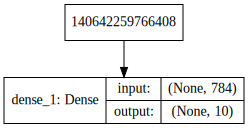

In [7]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))